## 1. Import Libraries

First, we'll import the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io
import os

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Display all columns
pd.set_option('display.max_columns', None)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Load and Convert ARFF to CSV

ARFF (Attribute-Relation File Format) is commonly used in WEKA machine learning. We'll parse this format and convert it to a pandas DataFrame.

In [23]:
def read_arff(file_path):
    """
    Read an ARFF file and convert it to a pandas DataFrame
    """
    with open(file_path, 'r') as f:
        content = f.read()
    
    # Extract attribute information
    attributes = []
    attribute_types = {}
    for match in re.finditer(r'@attribute\s+(\S+)\s+(\S+)', content, re.IGNORECASE):
        attribute_name = match.group(1)
        attribute_type = match.group(2)
        attributes.append(attribute_name)
        attribute_types[attribute_name] = attribute_type
    
    # Extract data
    data_match = re.search(r'@data\s+([\s\S]+)', content, re.IGNORECASE)
    if data_match:
        data_content = data_match.group(1)
        data_io = io.StringIO(data_content)
        df = pd.read_csv(data_io, comment='%', names=attributes)
        return df
    else:
        return pd.DataFrame()

# Read the ARFF file
file_path = 'd:\\Data_Processing\\china.arff'
china_df = read_arff(file_path)

# Save as CSV for easier future processing
csv_path = 'd:\\Data_Processing\\china.csv'
china_df.to_csv(csv_path, index=False)

# Display first few rows
print(f"Dataset shape: {china_df.shape}")
china_df.head()

Dataset shape: (499, 19)


,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
0,1,1587,774,260,340,128,0,1502,0,0,4.7,5.0,4.7,5.0,4,0,4.0,7490,7490
1,2,260,9,4,3,193,41,51,138,61,16.0,16.6,16.0,16.6,2,0,17.0,4150,4150
2,3,152,25,33,28,42,35,163,0,0,4.4,4.1,4.4,4.1,1,0,9.0,668,668
3,4,252,151,28,8,39,0,69,153,4,12.8,14.3,15.5,17.3,1,0,4.0,3901,3238
4,5,292,93,0,194,20,0,0,307,0,10.3,9.8,12.4,11.7,1,0,13.0,3607,2994


## 3. Data Overview and Exploration

Let's examine the structure of the dataset, display basic statistics, and understand the meaning of each feature.

In [24]:
# Display information about the dataset
print("Dataset Information:")
print(f"Number of instances (rows): {china_df.shape[0]}")
print(f"Number of features (columns): {china_df.shape[1]}")
print("\nFeature names:")
for col in china_df.columns:
    print(f"- {col}")

# Display summary statistics
print("\nSummary Statistics:")
china_df.describe().T

Dataset Information:
Number of instances (rows): 499
Number of features (columns): 19

Feature names:
- ID
- AFP
- Input
- Output
- Enquiry
- File
- Interface
- Added
- Changed
- Deleted
- PDR_AFP
- PDR_UFP
- NPDR_AFP
- NPDU_UFP
- Resource
- Dev.Type
- Duration
- N_effort
- Effort

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
ID,499.0,250.000000,144.193157,1.0,125.5,250.0,374.50,499.0
AFP,499.0,486.857715,1059.171436,9.0,100.5,215.0,437.50,17518.0
Input,499.0,167.098196,486.338575,0.0,27.0,63.0,152.50,9404.0
Output,499.0,113.601202,221.274374,0.0,13.0,42.0,112.00,2455.0
Enquiry,499.0,61.601202,105.422840,0.0,6.0,24.0,68.50,952.0
File,499.0,91.234469,210.270984,0.0,14.0,36.0,84.00,2955.0
Interface,499.0,24.234469,85.040996,0.0,0.0,0.0,20.00,1572.0
Added,499.0,360.354709,829.842333,0.0,38.0,135.0,325.50,13580.0
Changed,499.0,85.062124,290.857039,0.0,0.0,4.0,87.00,5193.0
Deleted,499.0,12.352705,124.224130,0.0,0.0,0.0,0.00,2657.0


In [25]:
# Check data types
print("Data Types:")
china_df.dtypes

Data Types:


ID             int64
AFP            int64
Input          int64
Output         int64
Enquiry        int64
File           int64
Interface      int64
Added          int64
Changed        int64
Deleted        int64
PDR_AFP      float64
PDR_UFP      float64
NPDR_AFP     float64
NPDU_UFP     float64
Resource       int64
Dev.Type       int64
Duration     float64
N_effort       int64
Effort         int64
dtype: object

In [26]:
# Basic description of each feature (based on common understanding of software metrics)
feature_descriptions = {
    'ID': 'Project identifier',
    'AFP': 'Adjusted Function Points',
    'Input': 'Number of input components',
    'Output': 'Number of output components',
    'Enquiry': 'Number of inquiry components',
    'File': 'Number of file components',
    'Interface': 'Number of interface components',
    'Added': 'Number of components added',
    'Changed': 'Number of components changed',
    'Deleted': 'Number of components deleted',
    'PDR_AFP': 'Productivity Delivery Rate (AFP)',
    'PDR_UFP': 'Productivity Delivery Rate (UFP)',
    'NPDR_AFP': 'Normalized Productivity Delivery Rate (AFP)',
    'NPDU_UFP': 'Normalized Productivity Delivery Rate (UFP)',
    'Resource': 'Development resource type',
    'Dev.Type': 'Development type',
    'Duration': 'Project duration (months)',
    'N_effort': 'Normalized effort (hours)',
    'Effort': 'Actual effort (hours)'
}

# Create a DataFrame to display the descriptions
descriptions_df = pd.DataFrame({
    'Feature': feature_descriptions.keys(),
    'Description': feature_descriptions.values()
})
descriptions_df

,Feature,Description
0,ID,Project identifier
1,AFP,Adjusted Function Points
2,Input,Number of input components
3,Output,Number of output components
4,Enquiry,Number of inquiry components
5,File,Number of file components
6,Interface,Number of interface components
7,Added,Number of components added
8,Changed,Number of components changed
9,Deleted,Number of components deleted


## 4. Handle Missing Data, Negative Values 

Now, let's check for missing values and negative values in the dataset and handle them if necessary.

In [27]:
# Check for missing values
missing_values = china_df.isnull().sum()
missing_percentage = (china_df.isnull().sum() / len(china_df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

print("Missing Data Analysis:")
missing_data[missing_data['Missing Values'] > 0]

# If no missing values are found
if missing_data['Missing Values'].sum() == 0:
    print("No missing values found in the dataset.")

Missing Data Analysis:
No missing values found in the dataset.


In [28]:
# Check for negative values
negative_values = (china_df < 0).sum()
negative_percentage = ((china_df < 0).sum() / len(china_df)) * 100
negative_data = pd.DataFrame({
    'Negative Values': negative_values,
    'Percentage': negative_percentage.round(2)
})
print("Negative Values Analysis:")
negative_data[negative_data['Negative Values'] > 0]
# If no negative values are found
if negative_data['Negative Values'].sum() == 0:
    print("No negative values found in the dataset.")

Negative Values Analysis:
No negative values found in the dataset.


## 5. Data Visualization and Distribution Analysis

We'll create various visualizations to understand the distribution of features and identify potential issues.

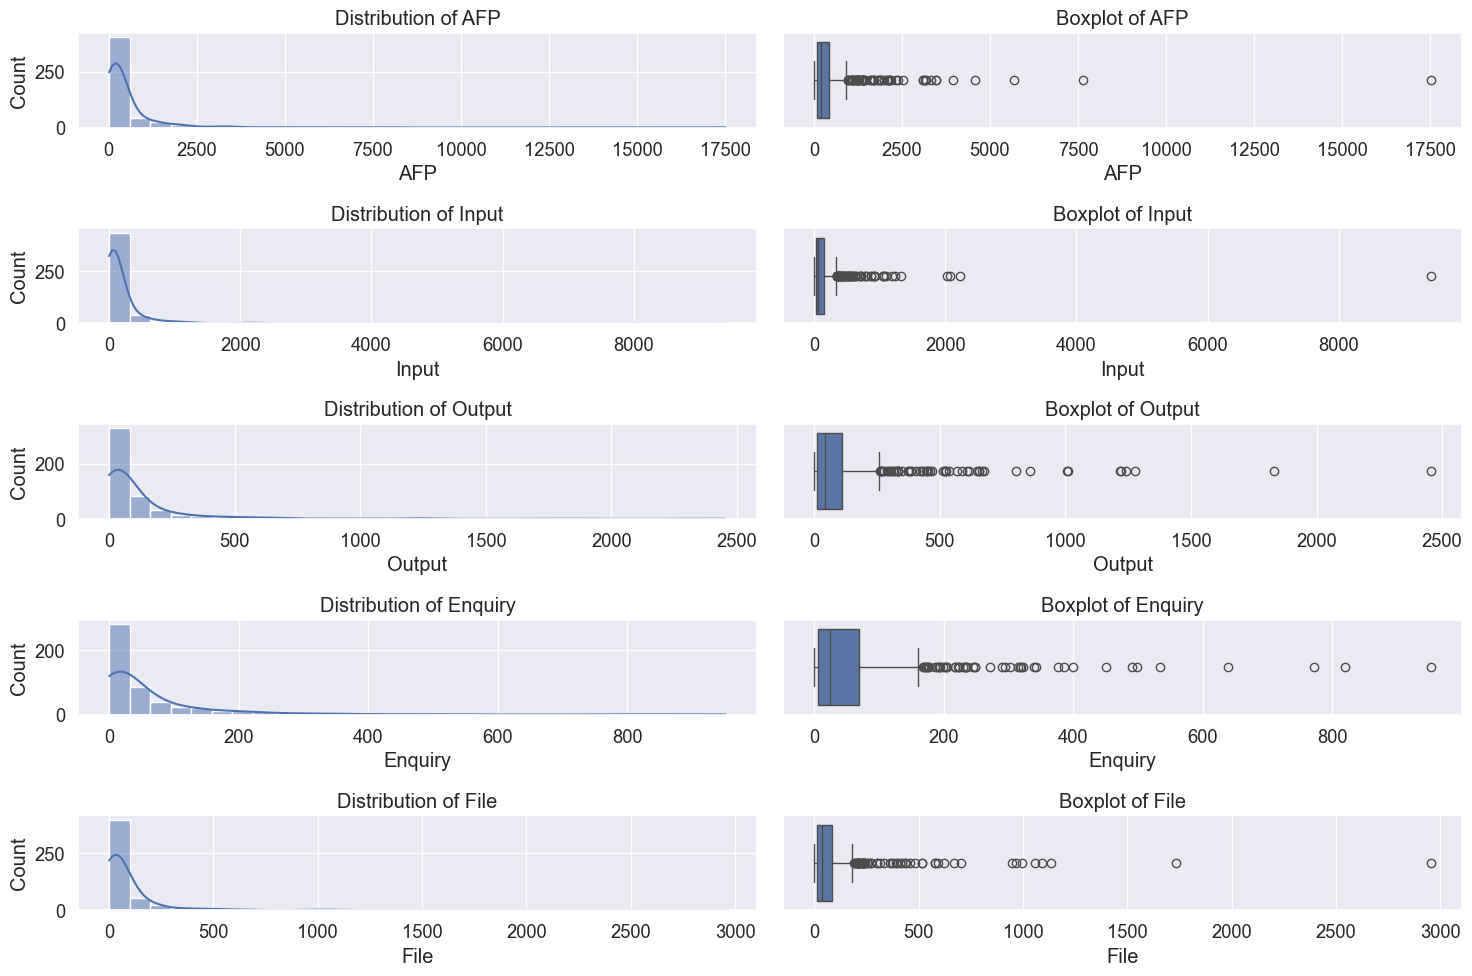

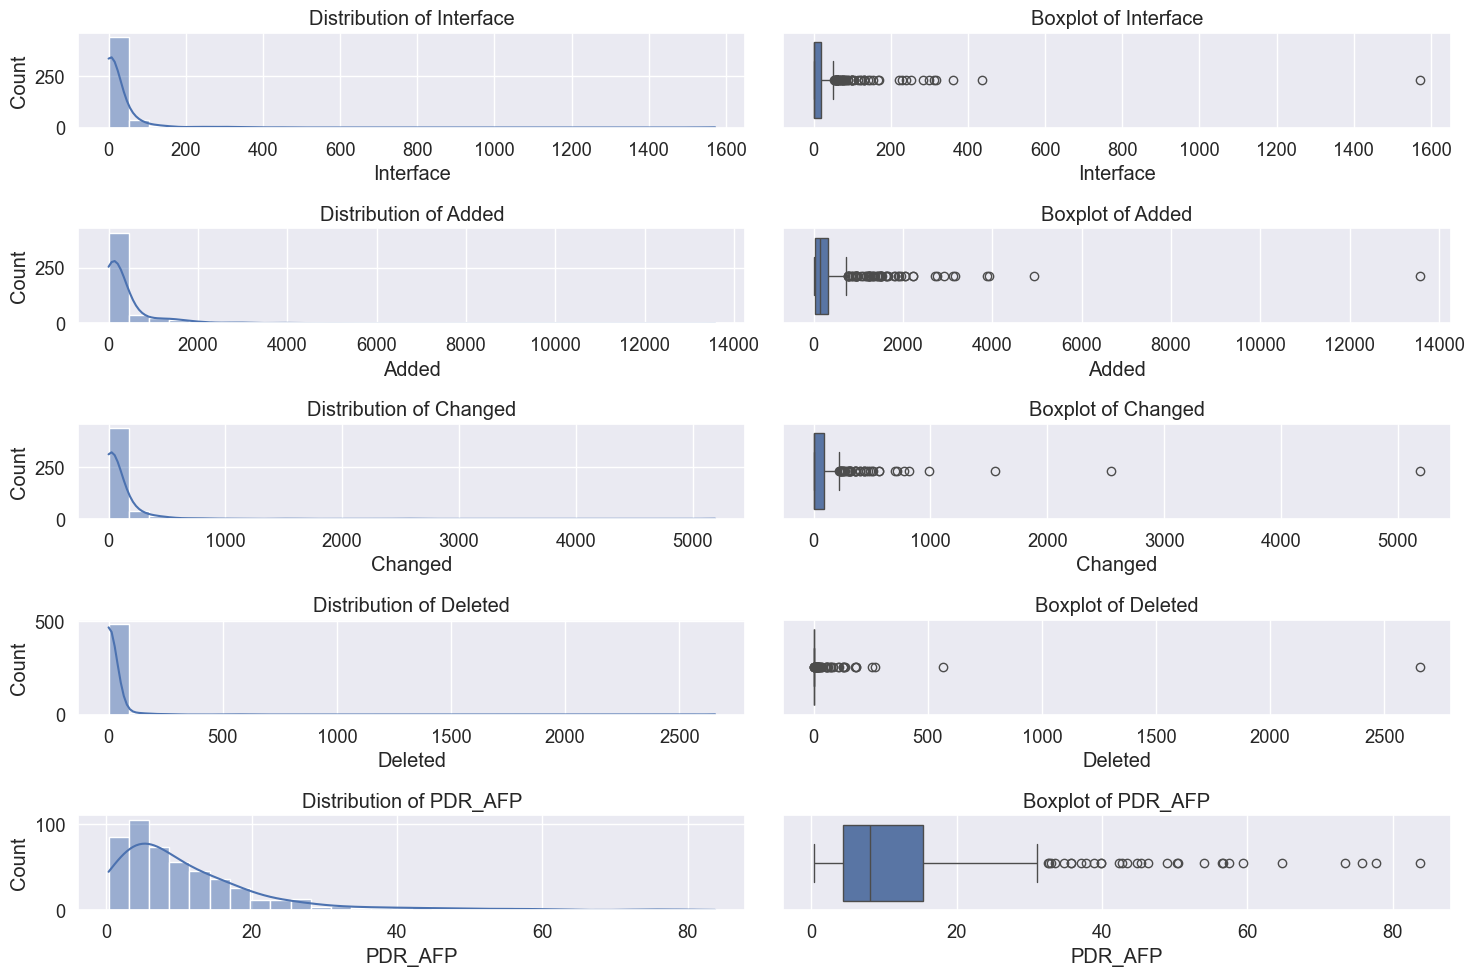

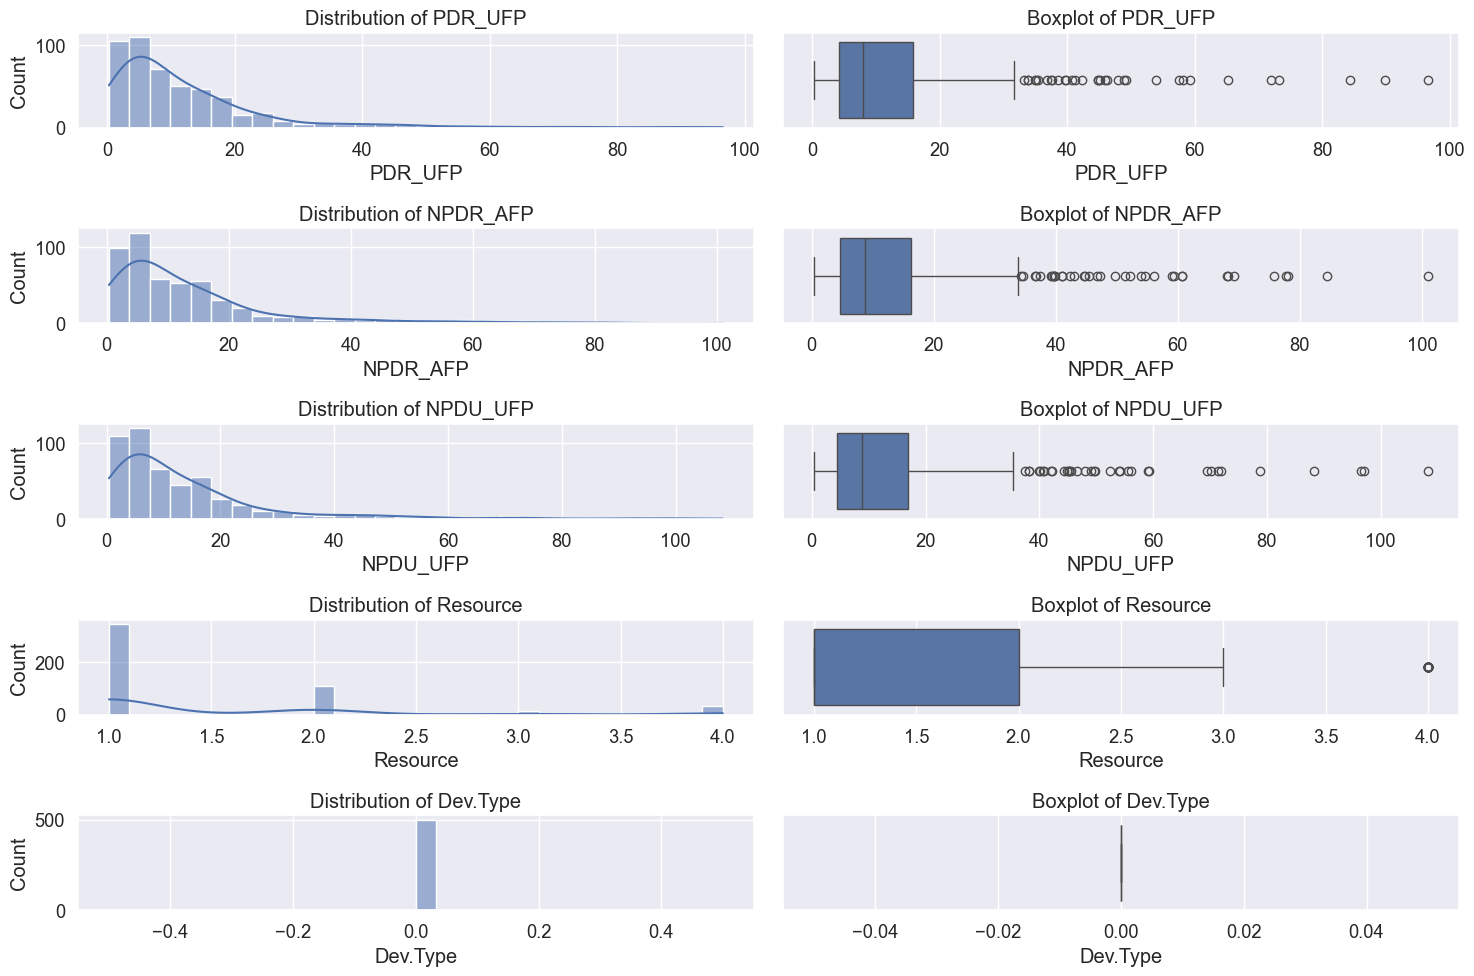

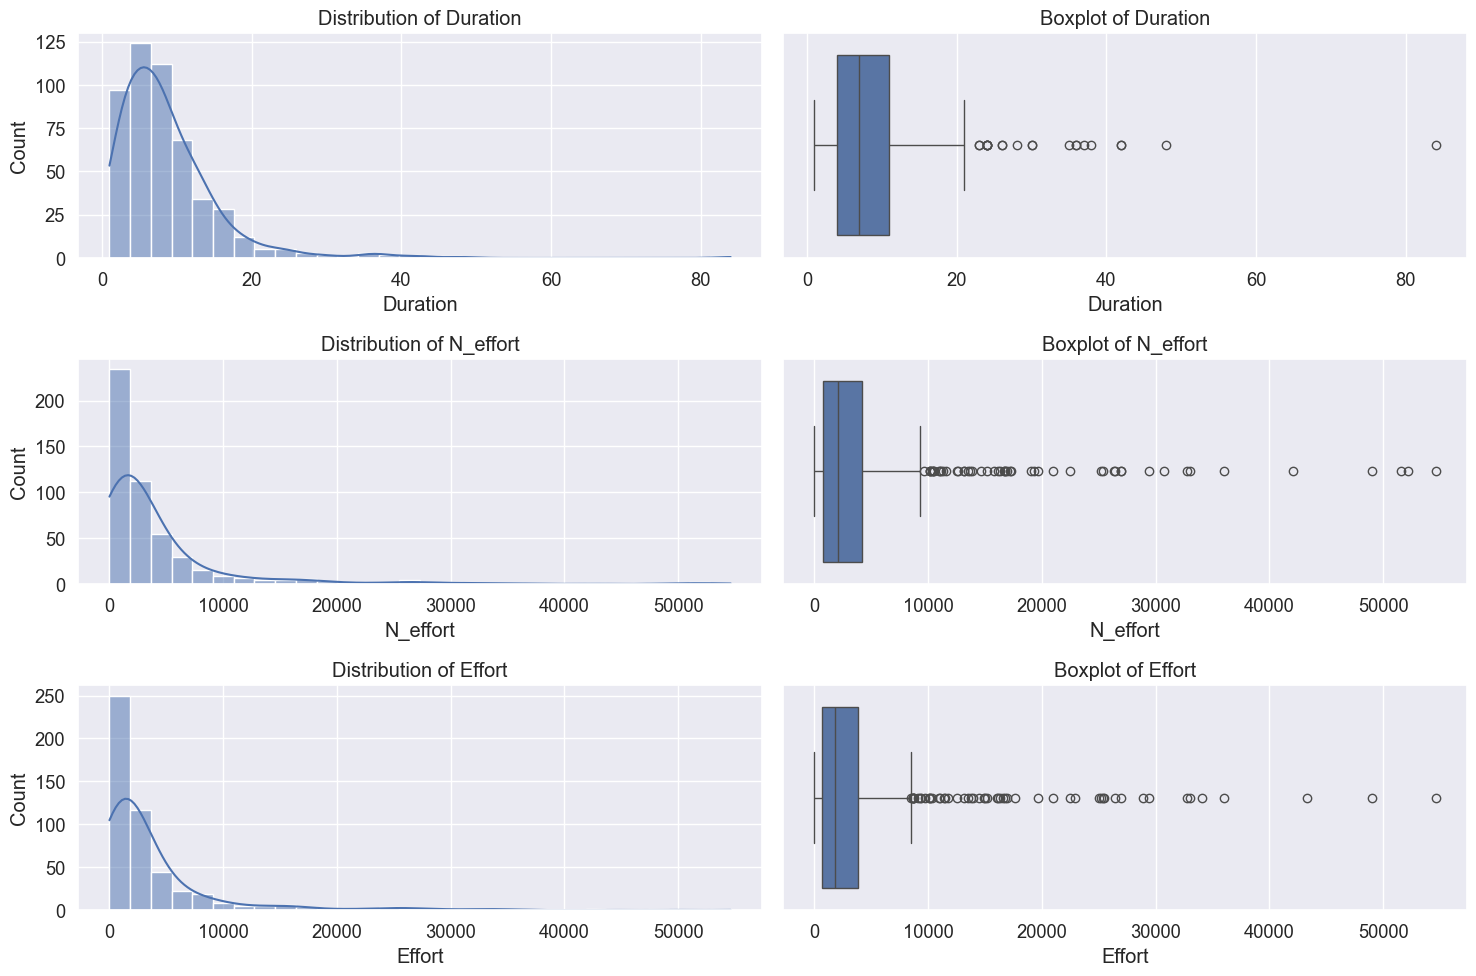

In [29]:
# Function to create histograms and boxplots for numerical features
def plot_distributions(df, columns, figsize=(15, 10), bins=30):
    """Plot histograms and boxplots for specified columns"""
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 2, figsize=figsize)
    
    for i, col in enumerate(columns):
        # Histogram with KDE
        sns.histplot(df[col], kde=True, ax=axes[i, 0], bins=bins)
        axes[i, 0].set_title(f'Distribution of {col}')
        axes[i, 0].set_xlabel(col)
        
        # Boxplot
        sns.boxplot(x=df[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

# Selecting numerical columns for visualization (excluding ID)
numerical_cols = china_df.select_dtypes(include=['number']).columns.tolist()
if 'ID' in numerical_cols:
    numerical_cols.remove('ID')

# Split the columns into groups for better visualization
group_size = 5
for i in range(0, len(numerical_cols), group_size):
    plot_distributions(china_df, numerical_cols[i:i+group_size])

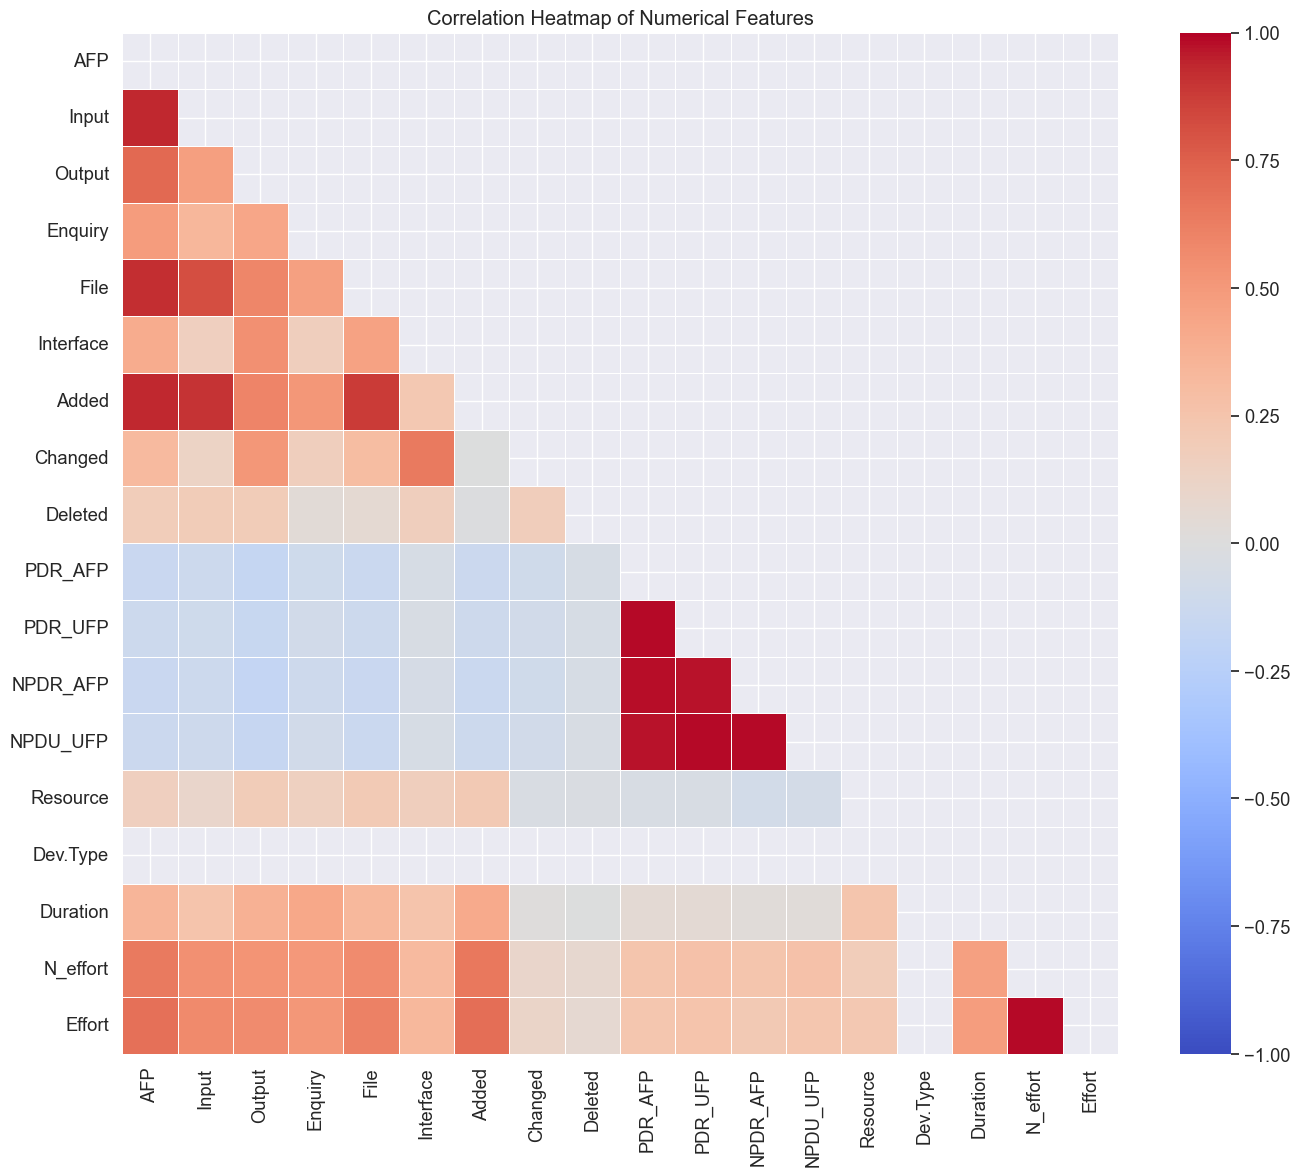

In [30]:
# Create a correlation heatmap for key numerical variables
plt.figure(figsize=(14, 12))
corr_matrix = china_df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

Skewness of numerical features:
Deleted      19.689820
Input        14.382441
Interface    12.983505
Changed      12.620401
AFP           9.804826
Added         9.345543
File          7.470662
Output        5.153761
Enquiry       4.044868
N_effort      4.009502
Effort        3.928701
Duration      3.697455
PDR_UFP       2.835805
NPDU_UFP      2.753980
PDR_AFP       2.603947
NPDR_AFP      2.542432
Resource      1.960674
Dev.Type      0.000000
dtype: float64


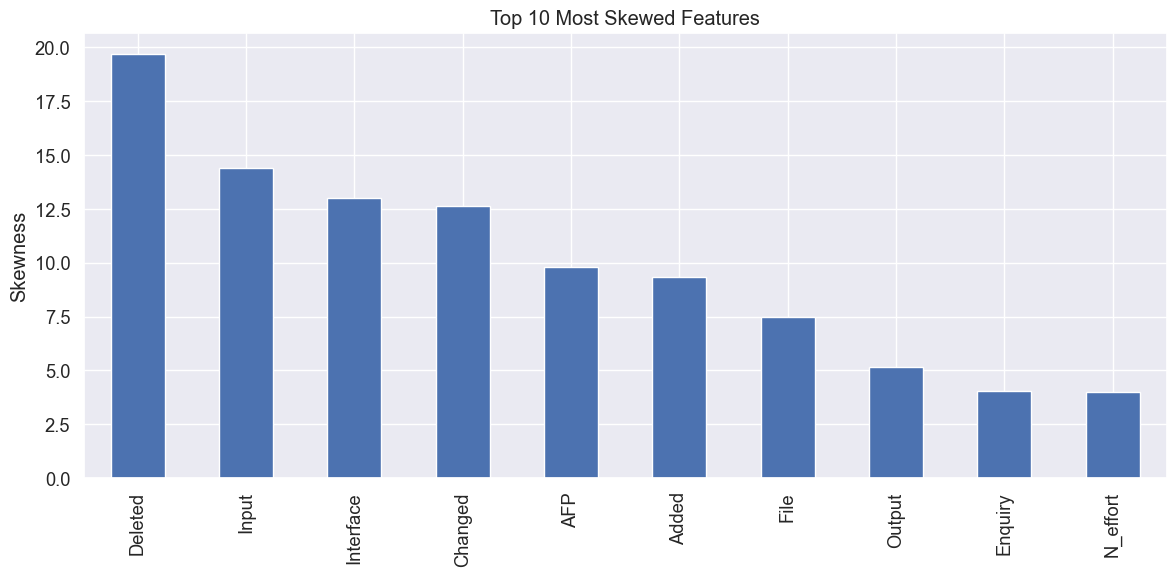

In [31]:
# Calculate skewness to identify highly skewed features
skewness = china_df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:")
print(skewness)

# Visualize the top 10 most skewed features
plt.figure(figsize=(12, 6))
skewness.head(10).plot(kind='bar')
plt.title('Top 10 Most Skewed Features')
plt.ylabel('Skewness')
plt.tight_layout()
plt.show()

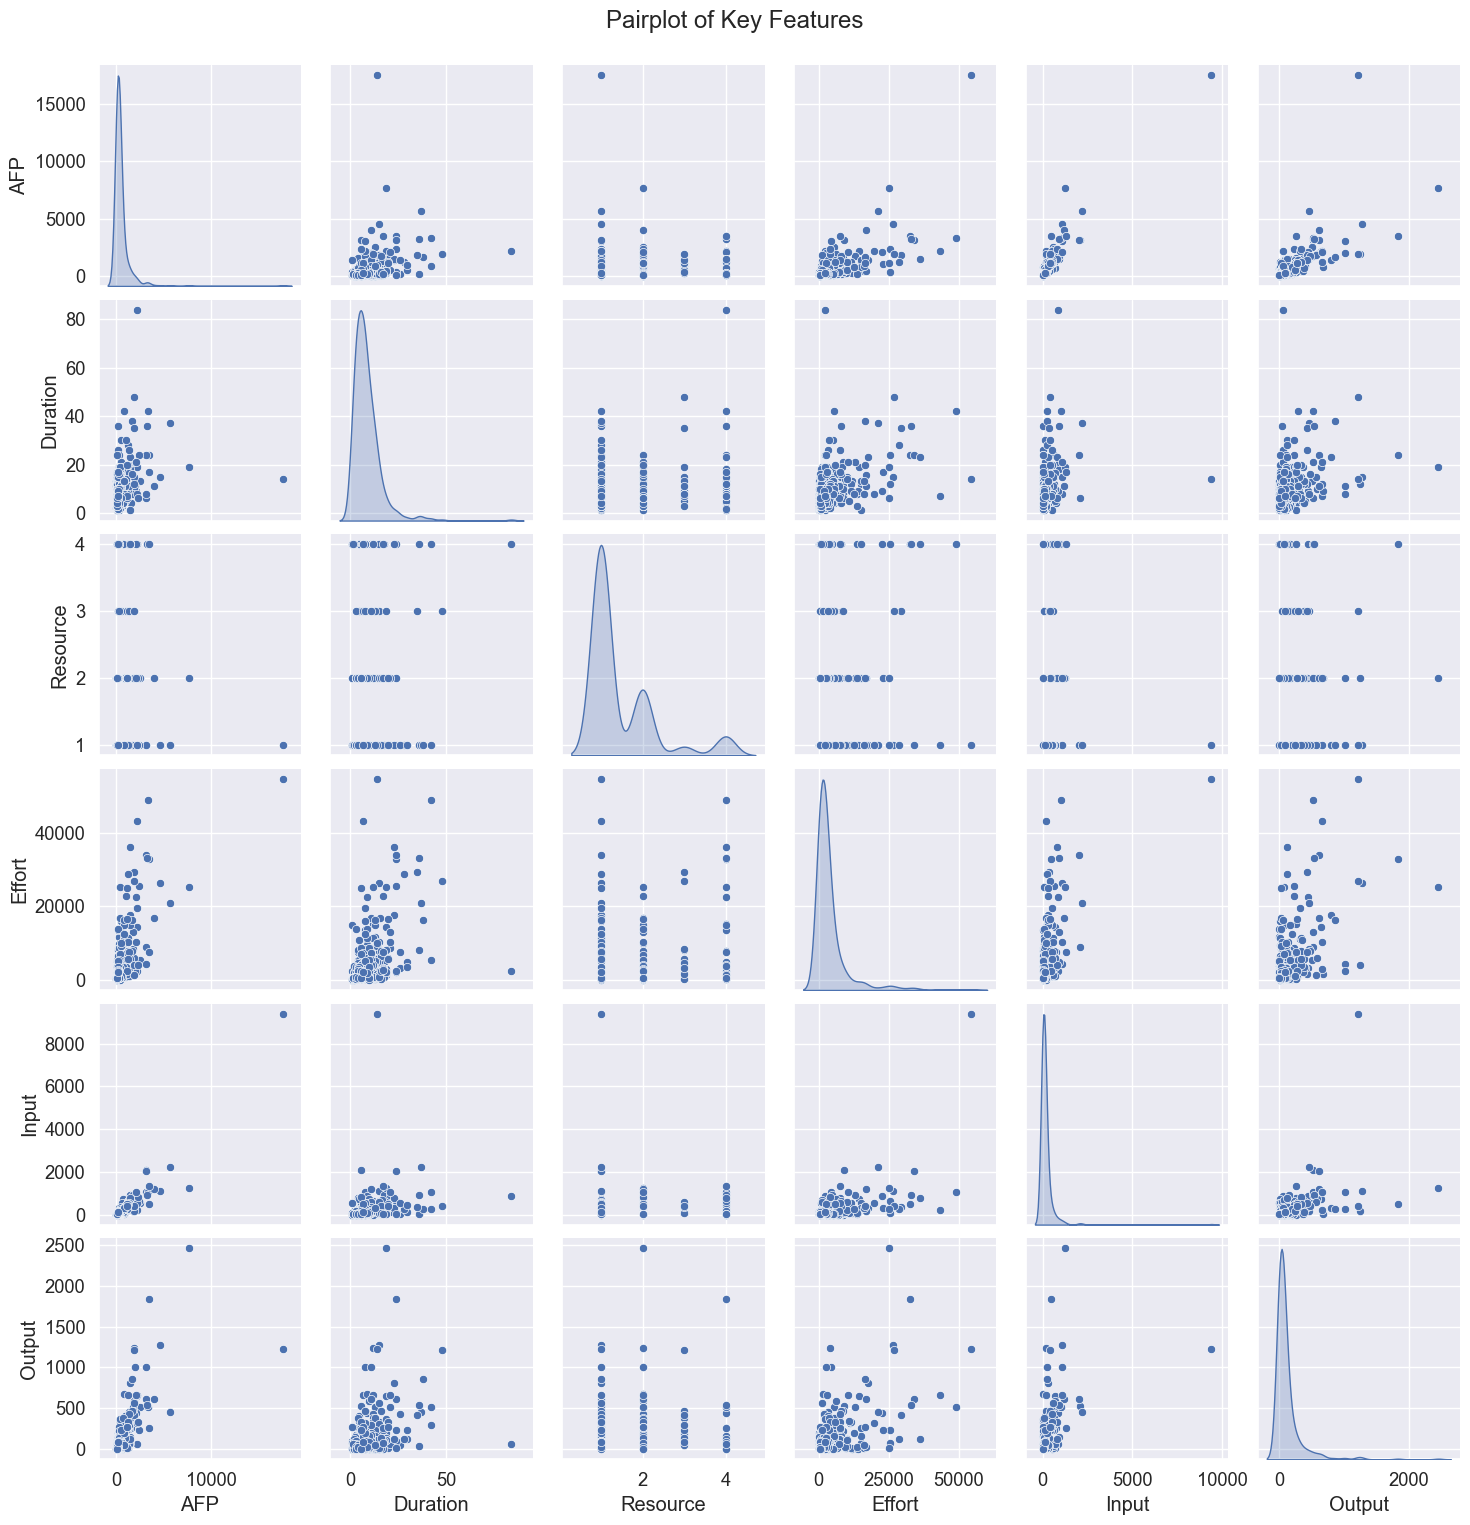

In [32]:
# Create pairplots for key variables
# Select a subset of important features to avoid overcrowding
key_features = ['AFP', 'Duration', 'Resource', 'Effort', 'Input', 'Output']
sns.pairplot(china_df[key_features], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## 6. Outlier Detection and Handling

Now we'll detect outliers using statistical methods and implement strategies to handle them.

In [33]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, col, threshold=3):
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = df[abs(z_scores) > threshold]
    return outliers

# Analyze outliers for important numerical columns
important_cols = ['AFP', 'Effort', 'Duration', 'PDR_AFP']
outlier_summary = {}

for col in important_cols:
    # IQR method
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(china_df, col)
    
    # Z-score method
    outliers_zscore = detect_outliers_zscore(china_df, col)
    
    outlier_summary[col] = {
        'IQR_count': len(outliers_iqr),
        'IQR_percentage': (len(outliers_iqr) / len(china_df)) * 100,
        'Z_score_count': len(outliers_zscore),
        'Z_score_percentage': (len(outliers_zscore) / len(china_df)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Create a DataFrame for the outlier summary
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index')
print("Outlier Analysis:")
outlier_df

Outlier Analysis:


,IQR_count,IQR_percentage,Z_score_count,Z_score_percentage,lower_bound,upper_bound
AFP,62,12.424850,5,1.002004,-405.00,943.00
Effort,54,10.821643,15,3.006012,-3981.00,8511.00
Duration,21,4.208417,9,1.803607,-6.50,21.50
PDR_AFP,31,6.212425,13,2.605210,-12.35,32.05


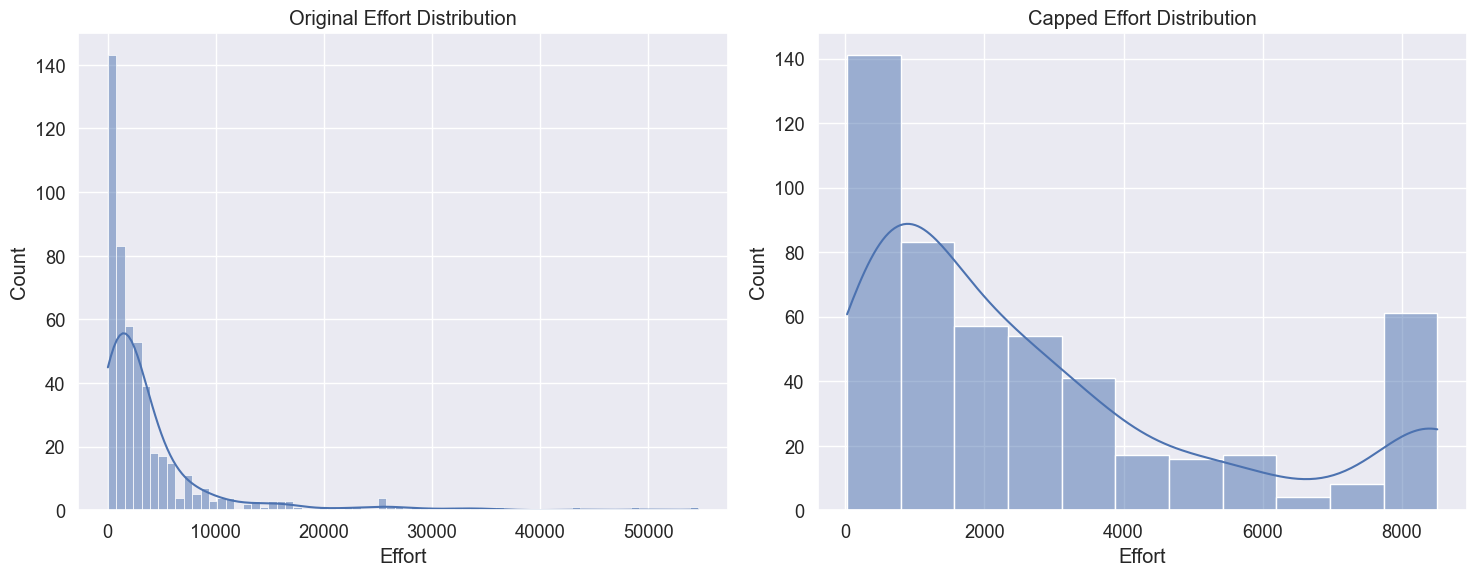

In [34]:
# Create a copy of the dataframe for handling outliers
china_clean = china_df.copy()

# Function to cap outliers using IQR method
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

# Cap outliers for important columns
for col in important_cols:
    china_clean = cap_outliers(china_clean, col)

# Compare original and capped distributions for one feature
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original distribution
sns.histplot(china_df['Effort'], kde=True, ax=axes[0])
axes[0].set_title('Original Effort Distribution')
axes[0].set_xlabel('Effort')

# Capped distribution
sns.histplot(china_clean['Effort'], kde=True, ax=axes[1])
axes[1].set_title('Capped Effort Distribution')
axes[1].set_xlabel('Effort')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

Let's examine correlations between features to understand relationships and potential redundancies.

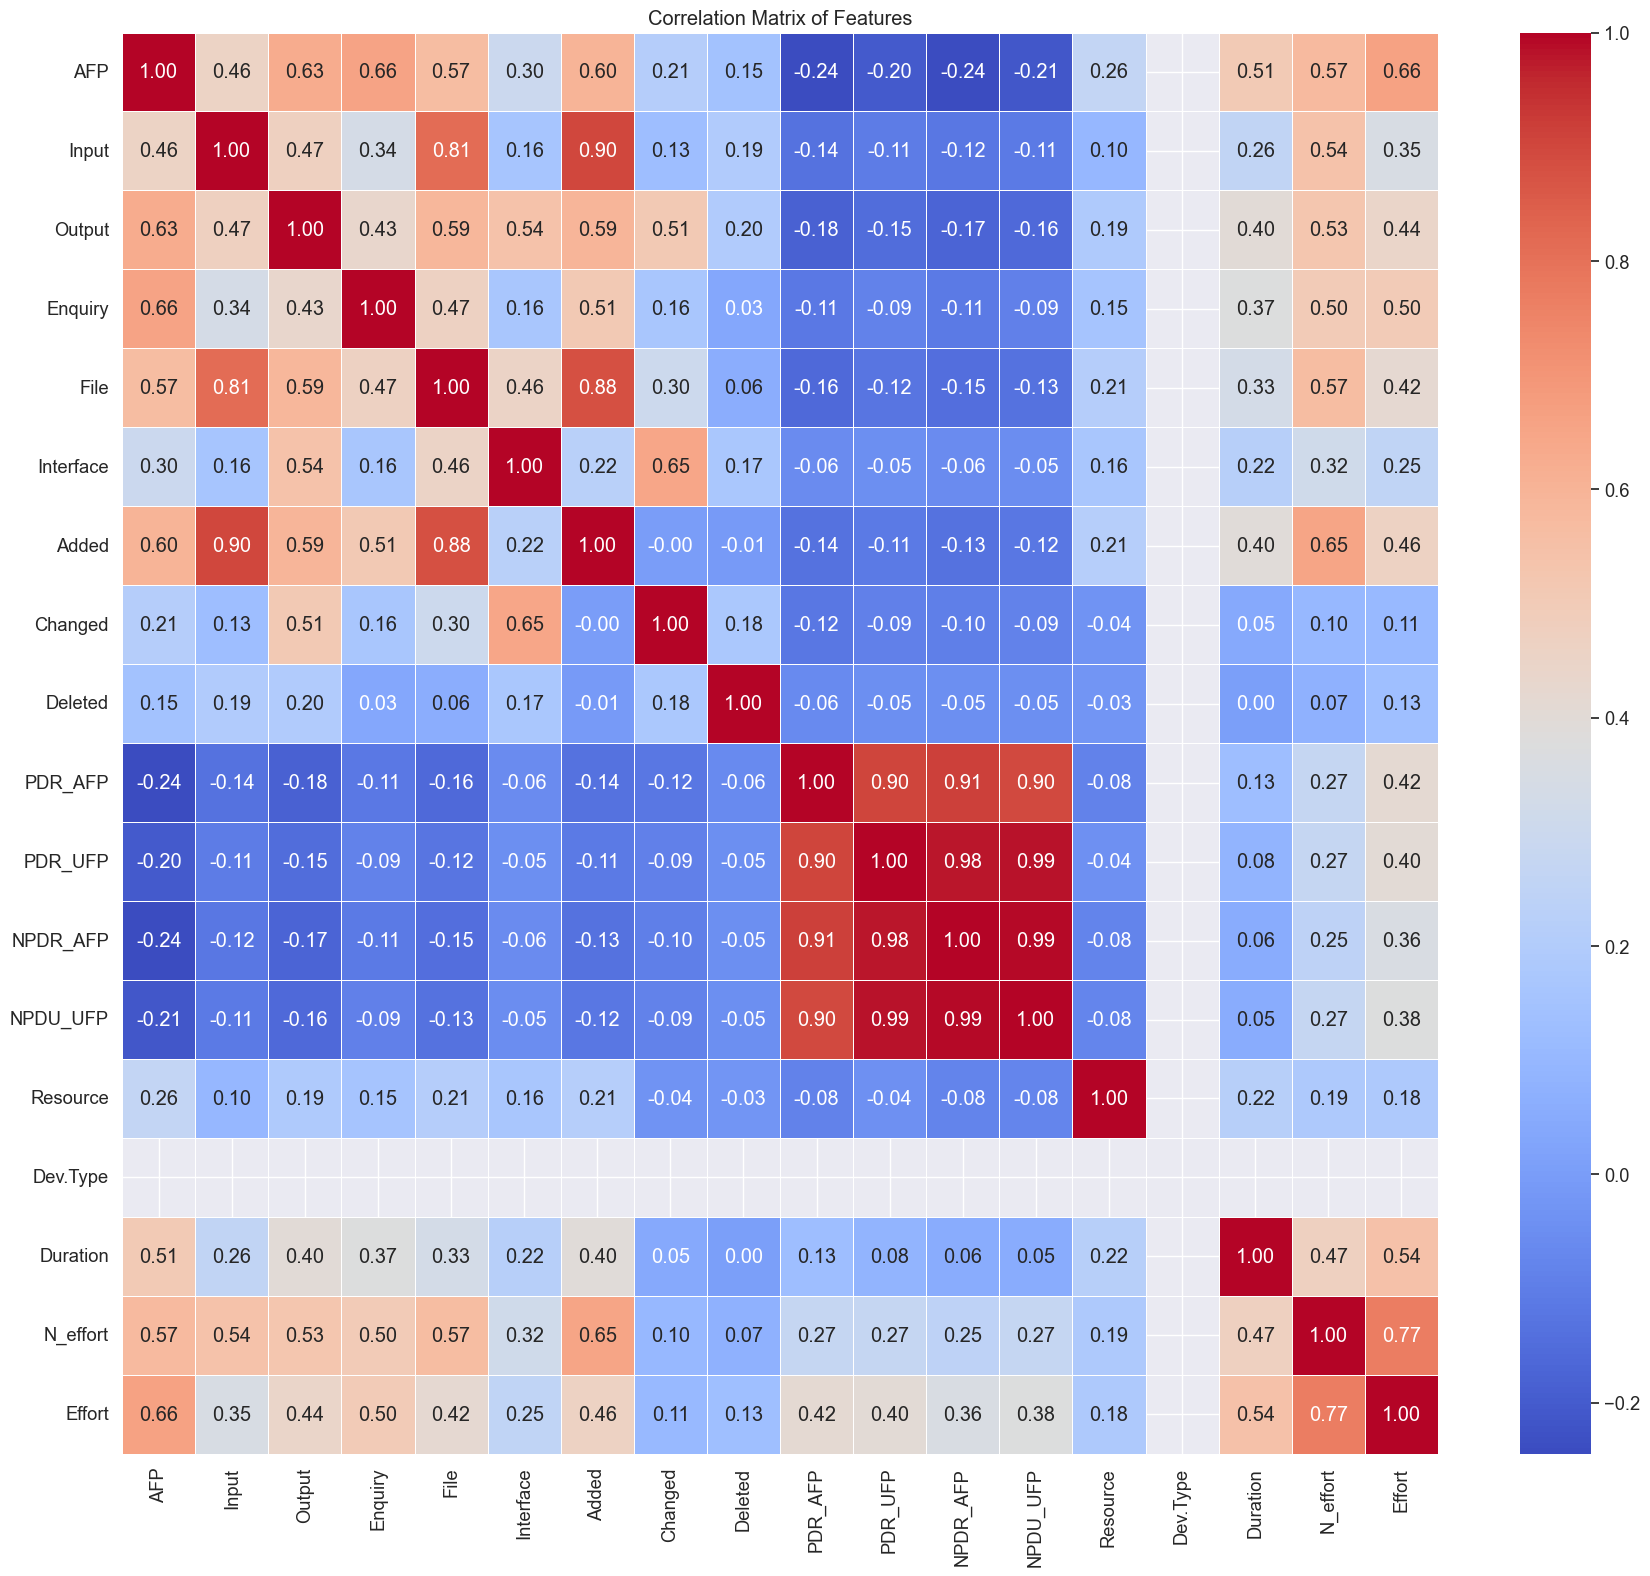

In [35]:
# Compute correlation matrix
correlation_matrix = china_clean[numerical_cols].corr()

# Create a heatmap with correlation values
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [36]:
# Identify pairs of highly correlated features (above 0.8)
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display highly correlated pairs
print("Highly correlated feature pairs (|correlation| > 0.8):")
pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

Highly correlated feature pairs (|correlation| > 0.8):


,Feature 1,Feature 2,Correlation
0,Input,File,0.812958
1,Input,Added,0.902650
2,File,Added,0.879229
3,PDR_AFP,PDR_UFP,0.904953
4,PDR_AFP,NPDR_AFP,0.913618
5,PDR_AFP,NPDU_UFP,0.897753
6,PDR_UFP,NPDR_AFP,0.976002
7,PDR_UFP,NPDU_UFP,0.985389
8,NPDR_AFP,NPDU_UFP,0.991364


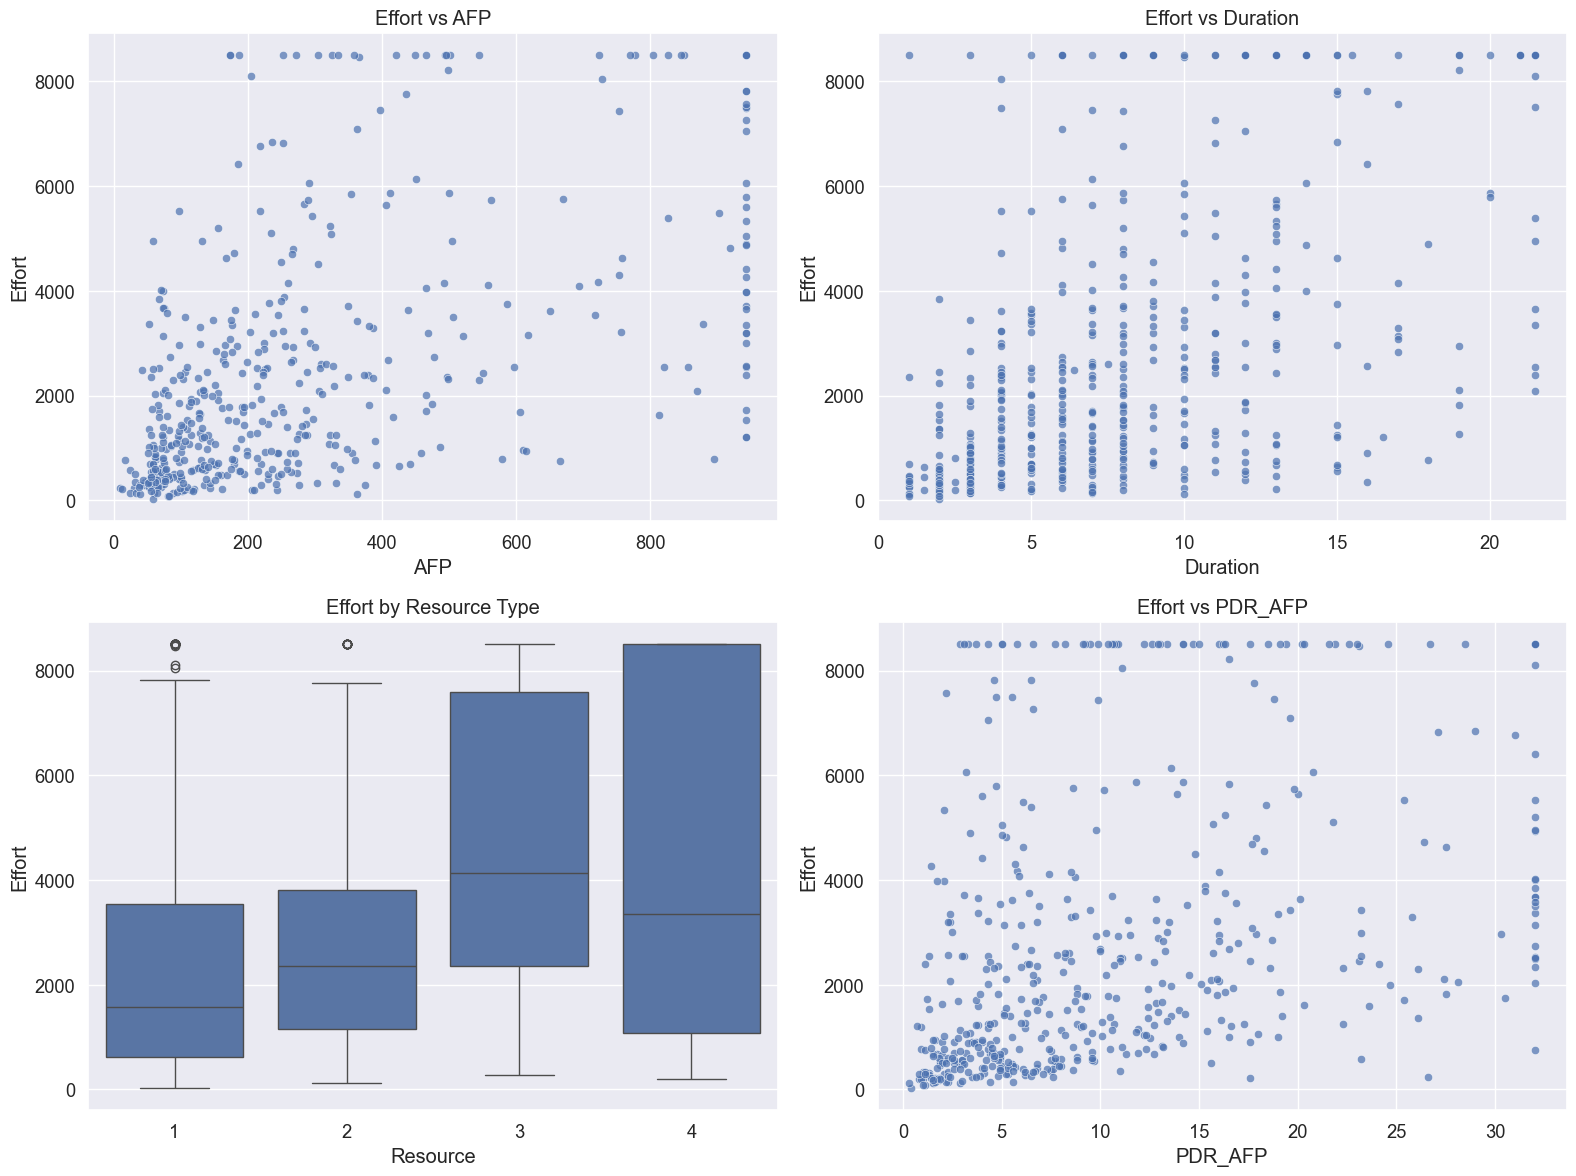

In [37]:
# Visualize relationships between effort and key metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Effort vs AFP
sns.scatterplot(x='AFP', y='Effort', data=china_clean, ax=axes[0, 0], alpha=0.7)
axes[0, 0].set_title('Effort vs AFP')

# Effort vs Duration
sns.scatterplot(x='Duration', y='Effort', data=china_clean, ax=axes[0, 1], alpha=0.7)
axes[0, 1].set_title('Effort vs Duration')

# Effort vs Resource
sns.boxplot(x='Resource', y='Effort', data=china_clean, ax=axes[1, 0])
axes[1, 0].set_title('Effort by Resource Type')

# Effort vs PDR_AFP
sns.scatterplot(x='PDR_AFP', y='Effort', data=china_clean, ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title('Effort vs PDR_AFP')

plt.tight_layout()
plt.show()

## 8. Feature Engineering

Let's create some new features and transform existing ones to improve the predictive power of our models.

In [38]:
# Create a copy for feature engineering
china_engineered = china_clean.copy()

# Calculate total components
china_engineered['TotalComponents'] = china_engineered['Input'] + china_engineered['Output'] + \
                                      china_engineered['Enquiry'] + china_engineered['File'] + \
                                      china_engineered['Interface']

# Calculate the effort per function point
china_engineered['EffortPerFP'] = china_engineered['Effort'] / china_engineered['AFP']

# Calculate effort per duration
china_engineered['EffortPerMonth'] = china_engineered['Effort'] / china_engineered['Duration']

# Create efficiency ratio (ratio of components changed to total components)
china_engineered['ChangeRatio'] = china_engineered['Changed'] / china_engineered['TotalComponents']

# Create feature for total component changes
china_engineered['TotalChanges'] = china_engineered['Added'] + china_engineered['Changed'] + china_engineered['Deleted']

# Apply log transformation to highly skewed features
skewed_features = ['AFP', 'Effort', 'N_effort', 'TotalComponents', 'EffortPerMonth']

for feature in skewed_features:
    # Add a small constant to avoid log(0)
    china_engineered[f'Log_{feature}'] = np.log1p(china_engineered[feature])

# Display the first few rows of the engineered dataset
print(f"Engineered dataset shape: {china_engineered.shape}")
china_engineered.head()

Engineered dataset shape: (499, 29)


,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort,TotalComponents,EffortPerFP,EffortPerMonth,ChangeRatio,TotalChanges,Log_AFP,Log_Effort,Log_N_effort,Log_TotalComponents,Log_EffortPerMonth
0,1,943.0,774,260,340,128,0,1502,0,0,4.7,5.0,4.7,5.0,4,0,4.0,7490,7490.0,1502,7.942736,1872.500000,0.000000,1502,6.850126,8.921458,8.921458,7.315218,7.535564
1,2,260.0,9,4,3,193,41,51,138,61,16.0,16.6,16.0,16.6,2,0,17.0,4150,4150.0,250,15.961538,244.117647,0.552000,250,5.564520,8.331105,8.331105,5.525453,5.501738
2,3,152.0,25,33,28,42,35,163,0,0,4.4,4.1,4.4,4.1,1,0,9.0,668,668.0,163,4.394737,74.222222,0.000000,163,5.030438,6.505784,6.505784,5.099866,4.320447
3,4,252.0,151,28,8,39,0,69,153,4,12.8,14.3,15.5,17.3,1,0,4.0,3901,3238.0,226,12.849206,809.500000,0.676991,226,5.533389,8.083020,8.269245,5.424950,6.697651
4,5,292.0,93,0,194,20,0,0,307,0,10.3,9.8,12.4,11.7,1,0,13.0,3607,2994.0,307,10.253425,230.307692,1.000000,307,5.680173,8.004700,8.190909,5.730100,5.443749


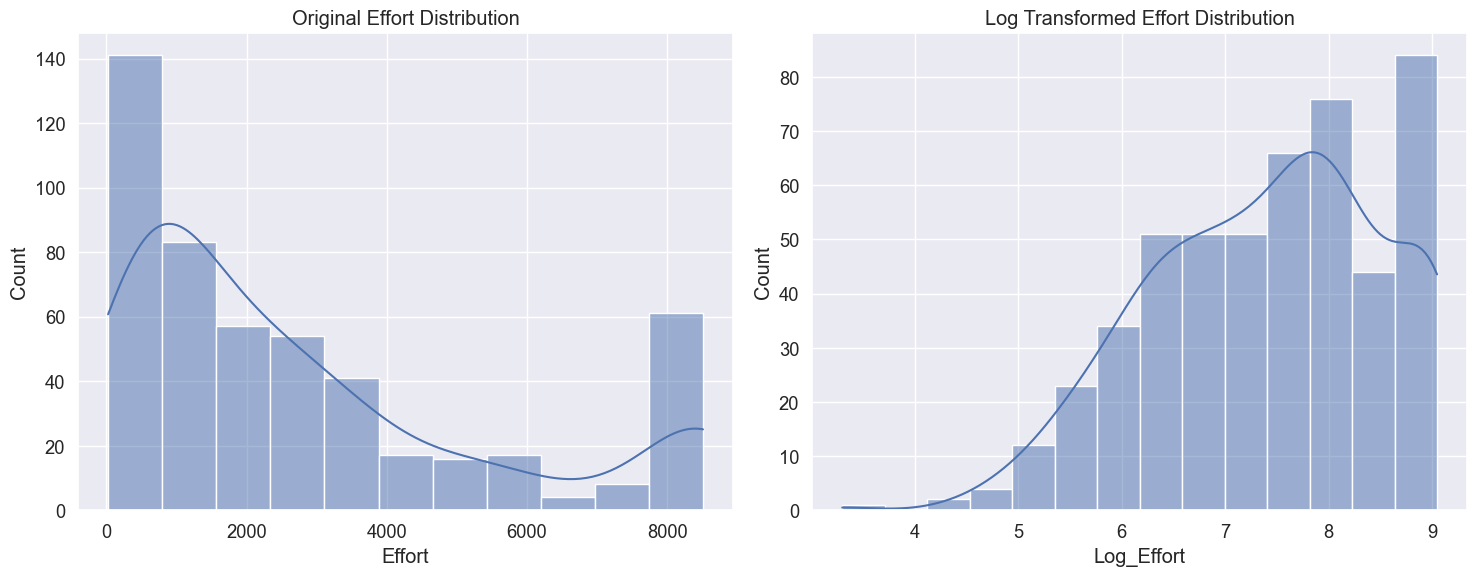

In [39]:
# Compare distributions before and after log transformation for Effort
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original distribution
sns.histplot(china_engineered['Effort'], kde=True, ax=axes[0])
axes[0].set_title('Original Effort Distribution')
axes[0].set_xlabel('Effort')

# Log transformed distribution
sns.histplot(china_engineered['Log_Effort'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed Effort Distribution')
axes[1].set_xlabel('Log_Effort')

plt.tight_layout()
plt.show()

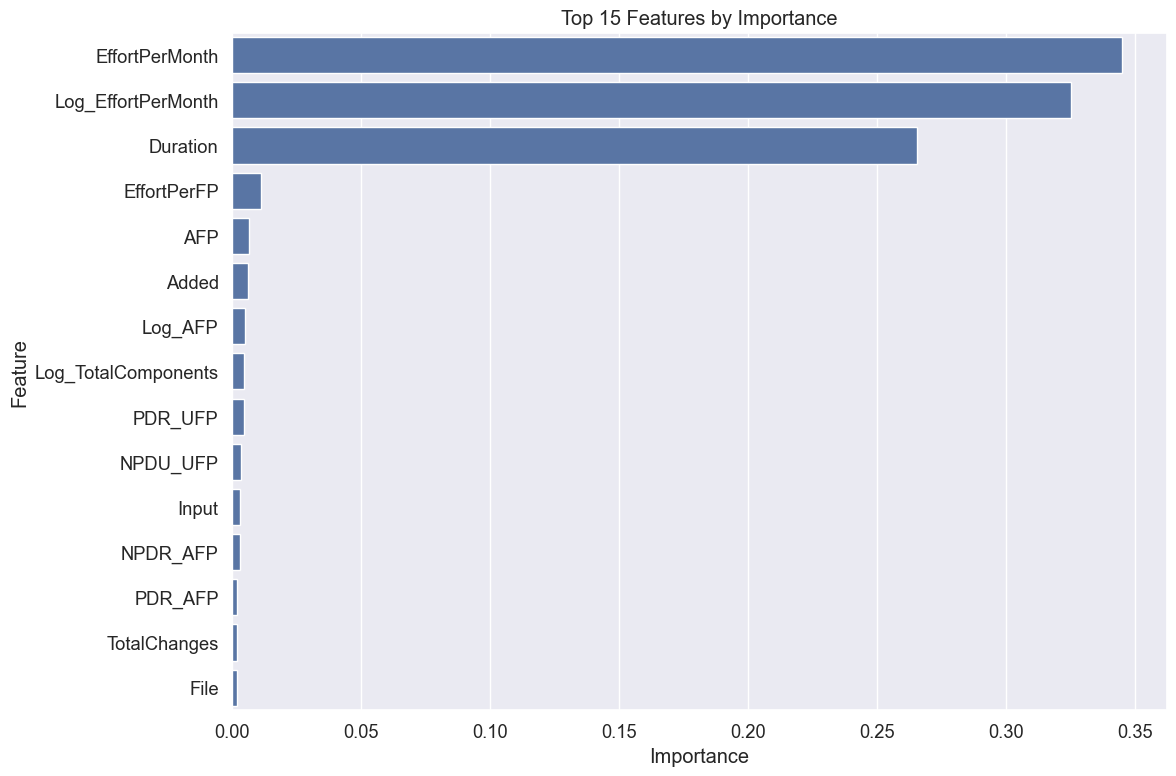

,Feature,Importance
18,EffortPerMonth,0.345189
23,Log_EffortPerMonth,0.325472
15,Duration,0.265417
17,EffortPerFP,0.011479
0,AFP,0.006456
6,Added,0.006189
21,Log_AFP,0.005208
22,Log_TotalComponents,0.004875
10,PDR_UFP,0.004771
12,NPDU_UFP,0.003716


In [40]:
# Feature importance for predicting Effort using a simple model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features (excluding ID, Effort, N_effort and log-transformed targets)
X = china_engineered.drop(['ID', 'Effort', 'N_effort', 'Log_Effort', 'Log_N_effort'], axis=1)
y = china_engineered['Log_Effort']  # Using log-transformed effort as target

# Train a simple Random Forest to get feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Features by Importance')
plt.tight_layout()
plt.show()

feature_importances.head(15)

## 9. Data Normalization and Scaling

Now, let's normalize numerical features to prepare for modeling.

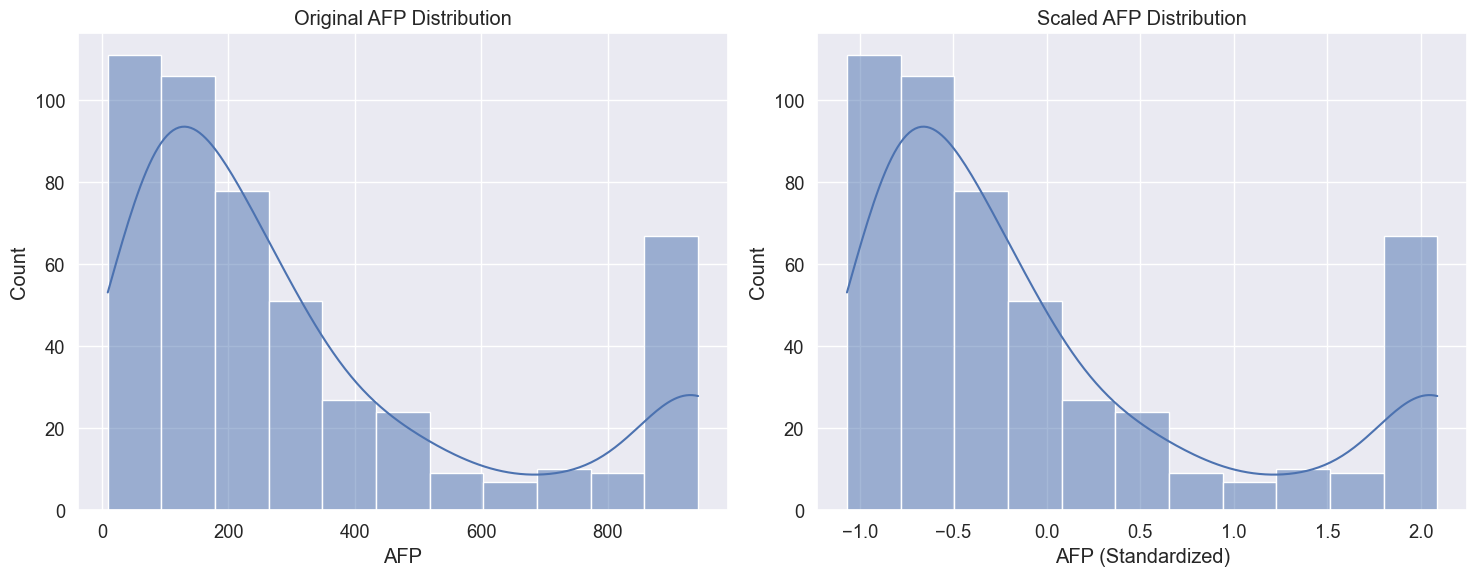

In [41]:
# Create a copy for scaling
china_scaled = china_engineered.copy()

# Select numerical features for scaling
# Exclude ID, categorical features, and already log-transformed features
numeric_features = [col for col in china_engineered.columns if 
                    col not in ['ID', 'Resource', 'Dev.Type'] and 
                    not col.startswith('Log_') and
                    china_engineered[col].dtype != 'object']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply Standard Scaling
china_scaled[numeric_features] = standard_scaler.fit_transform(china_engineered[numeric_features])

# Compare original and scaled distributions for AFP
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original distribution
sns.histplot(china_engineered['AFP'], kde=True, ax=axes[0])
axes[0].set_title('Original AFP Distribution')
axes[0].set_xlabel('AFP')

# Scaled distribution
sns.histplot(china_scaled['AFP'], kde=True, ax=axes[1])
axes[1].set_title('Scaled AFP Distribution')
axes[1].set_xlabel('AFP (Standardized)')

plt.tight_layout()
plt.show()

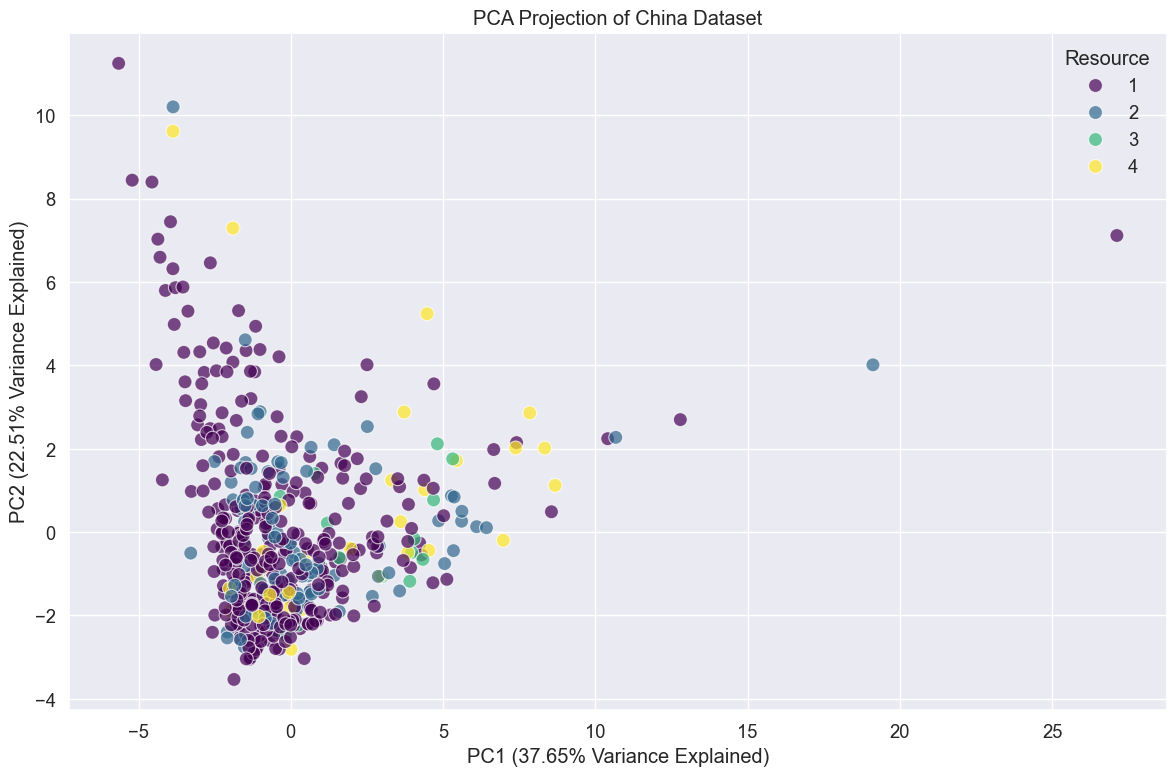

Total variance explained by 2 PCs: 60.17%


In [42]:
# Apply PCA to visualize data in reduced dimensions
from sklearn.decomposition import PCA

# Select features for PCA (exclude target variables and non-numeric)
pca_features = [f for f in china_scaled.columns if f not in 
                ['ID', 'Resource', 'Dev.Type', 'Effort', 'N_effort', 'Log_Effort', 'Log_N_effort']]

# Initialize PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(china_scaled[pca_features])

# Create DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Resource'] = china_scaled['Resource']

# Visualize the 2D projection
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Resource', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA Projection of China Dataset')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} Variance Explained)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} Variance Explained)')
plt.tight_layout()
plt.show()

# Print total variance explained
print(f"Total variance explained by 2 PCs: {sum(pca.explained_variance_ratio_):.2%}")

## 10. Export Processed Data

Finally, let's save the processed datasets for future use.

In [43]:
# Save the cleaned dataset
china_clean.to_csv('d:\\Data_Processing\\china_clean.csv', index=False)

# Save the engineered dataset
china_engineered.to_csv('d:\\Data_Processing\\china_engineered.csv', index=False)

# Save the scaled dataset
china_scaled.to_csv('d:\\Data_Processing\\china_scaled.csv', index=False)

print("Datasets saved successfully!")

# Final summary of the datasets
print("\nSummary of processed datasets:")
print(f"1. Original dataset: {china_df.shape[0]} rows, {china_df.shape[1]} columns")
print(f"2. Cleaned dataset: {china_clean.shape[0]} rows, {china_clean.shape[1]} columns")
print(f"3. Engineered dataset: {china_engineered.shape[0]} rows, {china_engineered.shape[1]} columns")
print(f"4. Scaled dataset: {china_scaled.shape[0]} rows, {china_scaled.shape[1]} columns")

Datasets saved successfully!

Summary of processed datasets:
1. Original dataset: 499 rows, 19 columns
2. Cleaned dataset: 499 rows, 19 columns
3. Engineered dataset: 499 rows, 29 columns
4. Scaled dataset: 499 rows, 29 columns


## Conclusion

In this notebook, we:

1. Loaded and converted the China ARFF dataset to a pandas DataFrame
2. Explored the data structure and basic statistics
3. Checked for missing values (none found)
4. Visualized distributions and identified skewed features
5. Detected and handled outliers using IQR method
6. Analyzed correlations between features
7. Engineered new features and transformed skewed features using log transformation
8. Applied scaling to normalize numerical features
9. Used PCA to visualize the data in reduced dimensions
10. Exported processed datasets for future modeling

The preprocessed data is now ready for building predictive models to estimate software development effort.